In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas_profiling

In [4]:
data = pd.read_pickle('./data.pickle')

In [5]:
select_features = ['role_created_3_login_num',
       'role_created_3_active', 'role_created_3_online',
       'role_created_3_max_role_level', 'role_created_3_ip_num',
       'role_created_3_device_num',
       'role_created_3_pay_num', 'role_created_3_pay_sum', 'active_0-8', 'active_8-12', 'active_12-14',
       'active_14-18', 'active_18-24', 'pay_grade_1', 'pay_grade_2',
       'pay_grade_3', 'pay_grade_4', 'pay_grade_5', 'pay_grade_6',
       'role_created_3_pay_rate', 'role_created_3_pay_avg',
       'model_money_level', 'hour', 'weekend', 'is_holidays','mobile','platform',
       'user_creates_3_server_num','user_creates_3_role_num', 'time_interval']
label = ['role_created_30_pay_sum']

In [6]:
df = data[select_features].join(data[label])

In [7]:
pd.set_option('display.max_columns',None)
df.head()

,role_created_3_login_num,role_created_3_active,role_created_3_online,role_created_3_max_role_level,role_created_3_ip_num,role_created_3_device_num,role_created_3_pay_num,role_created_3_pay_sum,active_0-8,active_8-12,active_12-14,active_14-18,active_18-24,pay_grade_1,pay_grade_2,pay_grade_3,pay_grade_4,pay_grade_5,pay_grade_6,role_created_3_pay_rate,role_created_3_pay_avg,model_money_level,hour,weekend,is_holidays,mobile,platform,user_creates_3_server_num,user_creates_3_role_num,time_interval,role_created_30_pay_sum
0,1.0,1.0,7288.0,8.0168,1.0,1.0,0.0,0.0,0,0,15,10,0,0,0,0,0,0,0,0.0,0.0,0.0,13,4,0,0,1.0,1.0,2.0,0.0,NaN
1,1.0,1.0,907.0,1.0000,1.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,4.0,13,4,0,0,1.0,1.0,1.0,NaN,NaN
2,3.6,1.0,907.0,1.0000,1.0,1.0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0.0,0.0,4.0,13,4,0,0,1.0,2.0,2.0,3.0,NaN
3,1.0,1.0,907.0,1.0000,1.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,1.0,13,4,0,0,1.0,1.0,1.0,0.0,NaN
4,10.8,1.0,2437.0,2.6807,1.0,1.0,0.0,0.0,0,0,9,0,0,0,0,0,0,0,0,0.0,0.0,3.0,13,4,0,0,1.0,1.0,1.0,0.0,NaN


In [8]:
df.isna().sum()

role_created_3_login_num               0
role_created_3_active                  0
role_created_3_online                  0
role_created_3_max_role_level          0
role_created_3_ip_num                  0
role_created_3_device_num              0
role_created_3_pay_num                 0
role_created_3_pay_sum                 0
active_0-8                             0
active_8-12                            0
active_12-14                           0
active_14-18                           0
active_18-24                           0
pay_grade_1                            0
pay_grade_2                            0
pay_grade_3                            0
pay_grade_4                            0
pay_grade_5                            0
pay_grade_6                            0
role_created_3_pay_rate                0
role_created_3_pay_avg                 0
model_money_level                   1526
hour                                   0
weekend                                0
is_holidays     

In [9]:
df['role_created_30_pay_sum'].fillna(0,inplace=True)
df['platform'].fillna(0,inplace=True)
df['user_creates_3_server_num'].fillna(1,inplace=True)
df['user_creates_3_role_num'].fillna(1,inplace=True)
df['time_interval'].fillna(0,inplace=True)
df['model_money_level'].fillna(4,inplace=True)

In [10]:
df.columns

Index(['role_created_3_login_num', 'role_created_3_active',
       'role_created_3_online', 'role_created_3_max_role_level',
       'role_created_3_ip_num', 'role_created_3_device_num',
       'role_created_3_pay_num', 'role_created_3_pay_sum', 'active_0-8',
       'active_8-12', 'active_12-14', 'active_14-18', 'active_18-24',
       'pay_grade_1', 'pay_grade_2', 'pay_grade_3', 'pay_grade_4',
       'pay_grade_5', 'pay_grade_6', 'role_created_3_pay_rate',
       'role_created_3_pay_avg', 'model_money_level', 'hour', 'weekend',
       'is_holidays', 'mobile', 'platform', 'user_creates_3_server_num',
       'user_creates_3_role_num', 'time_interval', 'role_created_30_pay_sum'],
      dtype='object')

In [11]:
numeric_features = ['role_created_3_login_num', 'role_created_3_active',
       'role_created_3_online', 'role_created_3_max_role_level',
       'role_created_3_ip_num', 'role_created_3_device_num',
       'role_created_3_pay_num', 'role_created_3_pay_sum', 'active_0-8',
       'active_8-12', 'active_12-14', 'active_14-18', 'active_18-24',
       'pay_grade_1', 'pay_grade_2', 'pay_grade_3', 'pay_grade_4',
       'pay_grade_5', 'pay_grade_6', 'role_created_3_pay_rate',
       'role_created_3_pay_avg','user_creates_3_server_num',
       'user_creates_3_role_num','role_created_30_pay_sum']
categorical_features = np.setdiff1d(df.columns,numeric_features)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5078416 entries, 0 to 5078415
Data columns (total 31 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   role_created_3_login_num       float64
 1   role_created_3_active          float64
 2   role_created_3_online          float64
 3   role_created_3_max_role_level  float64
 4   role_created_3_ip_num          float64
 5   role_created_3_device_num      float64
 6   role_created_3_pay_num         float64
 7   role_created_3_pay_sum         float64
 8   active_0-8                     int64  
 9   active_8-12                    int64  
 10  active_12-14                   int64  
 11  active_14-18                   int64  
 12  active_18-24                   int64  
 13  pay_grade_1                    int64  
 14  pay_grade_2                    int64  
 15  pay_grade_3                    int64  
 16  pay_grade_4                    int64  
 17  pay_grade_5                    int64  
 18  pa

In [13]:
df.describe()

,role_created_3_login_num,role_created_3_active,role_created_3_online,role_created_3_max_role_level,role_created_3_ip_num,role_created_3_device_num,role_created_3_pay_num,role_created_3_pay_sum,active_0-8,active_8-12,active_12-14,active_14-18,active_18-24,pay_grade_1,pay_grade_2,pay_grade_3,pay_grade_4,pay_grade_5,pay_grade_6,role_created_3_pay_rate,role_created_3_pay_avg,model_money_level,hour,weekend,is_holidays,mobile,platform,user_creates_3_server_num,user_creates_3_role_num,time_interval,role_created_30_pay_sum
count,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06,5.078416e+06
mean,4.758215e+00,1.209398e+00,4.342969e+03,6.443501e+00,1.315548e+00,1.002682e+00,7.962109e-02,5.109489e+00,2.770963e+00,2.340527e+00,1.390465e+00,2.821770e+00,3.825981e+00,4.657161e-03,4.845389e-02,1.790184e-02,5.108876e-03,7.626394e-04,2.736680e-03,2.818462e-02,7.164250e-01,3.573915e+00,1.503201e+01,3.089191e+00,7.470203e-02,1.711102e-01,1.184523e+00,1.104560e+00,1.105100e+00,4.492131e-01,1.946188e+01
std,8.673915e+00,5.602056e-01,1.174186e+04,1.402030e+01,1.189653e+00,6.055399e-02,9.348059e-01,1.343326e+02,1.342110e+01,8.777801e+00,5.020395e+00,9.195238e+00,1.227851e+01,6.817102e-02,4.574772e-01,2.851986e-01,1.332030e-01,4.049070e-02,1.536443e-01,3.224753e-01,7.375871e+00,2.167235e+00,5.650631e+00,1.976406e+00,2.629100e-01,3.766053e-01,4.109191e-01,1.542183e+00,1.588329e+00,1.620193e+00,6.065607e+02
min,1.000000e+00,1.000000e+00,9.070000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.070000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,9.070000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.600000e+01,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,9.070000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.900000e+01,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+02,3.000000e+00,8.640000e+04,6.500000e+01,5.500000e+01,2.000000e+01,1.420000e+02,5.449000e+04,2.333000e+03,1.165000e+03,8.500000e+02,1.053000e+03,1.092000e+03,3.000000e+00,2.200000e+01,2.500000e+01,2.000000e+01,9.000000e+00,7.700000e+01,4.733176e+01,6.479838e+02,1.100000e+01,2.300000e+01,6.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.310000e+02,1.410000e+02,7.000000e+00,1.567880e+05


In [14]:
df['role_created_30_pay_sum'].value_counts()

0.0        4951219
12.0         31724
30.0         10178
42.0          8822
48.0          3611
            ...   
10106.0          1
10110.0          1
10112.0          1
10118.0          1
6134.0           1
Name: role_created_30_pay_sum, Length: 5459, dtype: int64

In [16]:
df['role_created_3_pay_sum'].value_counts()

0.0        4972920
12.0         34637
30.0         10801
42.0          8661
60.0          3080
            ...   
4528.0           1
4534.0           1
3160.0           1
4542.0           1
54490.0          1
Name: role_created_3_pay_sum, Length: 2499, dtype: int64

In [20]:
df[(df['role_created_3_pay_sum'] < 12) & (df['role_created_3_pay_sum'] >0)].shape

(5, 31)

In [19]:
df[df['role_created_3_pay_sum'] == 12]['role_created_30_pay_sum'].value_counts()

12.0      24681
42.0       2491
48.0       1144
78.0        355
170.0       311
          ...  
2706.0        1
758.0         1
1226.0        1
1288.0        1
4152.0        1
Name: role_created_30_pay_sum, Length: 728, dtype: int64

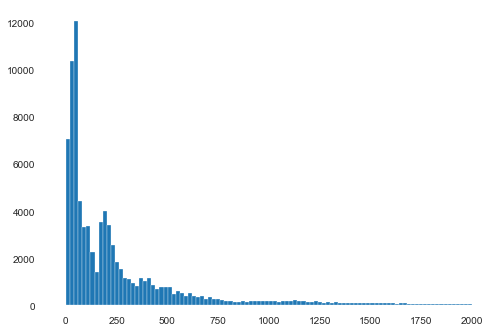

In [21]:
plt.hist(df[(df['role_created_30_pay_sum'] > 0)& (df['role_created_3_pay_sum'] !=12)]['role_created_30_pay_sum'],bins=100, range=(1,2000))
plt.show()

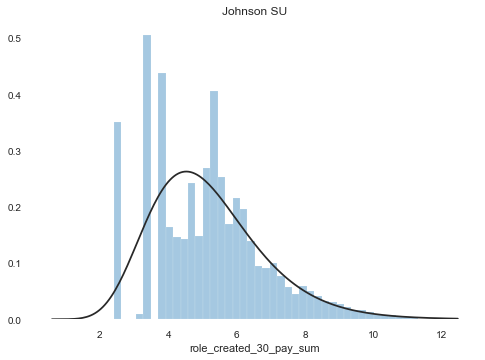

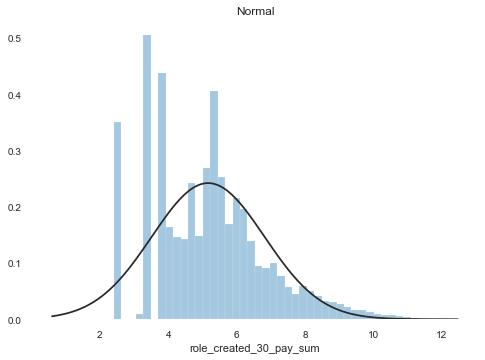

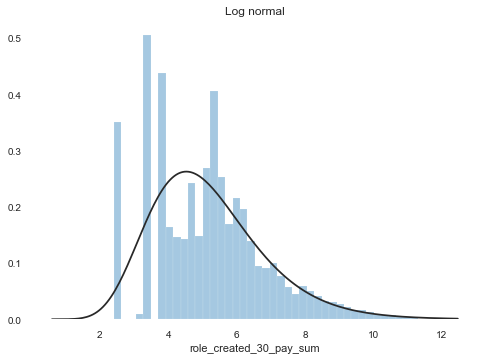

In [22]:
# 了解target总体分布情况
import scipy.stats as st
y = np.log1p(df[(df['role_created_30_pay_sum'] > 0)& (df['role_created_3_pay_sum'] !=12)]['role_created_30_pay_sum'])
plt.figure(1);plt.title('Johnson SU')
sns.distplot(y,kde=False,fit=st.johnsonsu)
plt.figure(2);plt.title('Normal')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(3);plt.title('Log normal')
sns.distplot(y,kde=False,fit=st.lognorm)

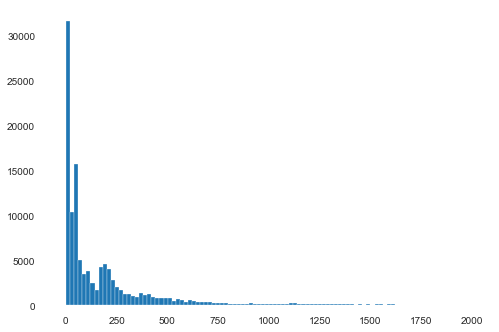

In [15]:
plt.hist(df[df['role_created_30_pay_sum'] > 0]['role_created_30_pay_sum'],bins=100, range=(1,2000))
plt.show()

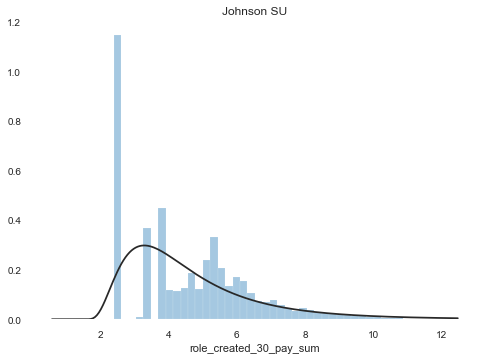

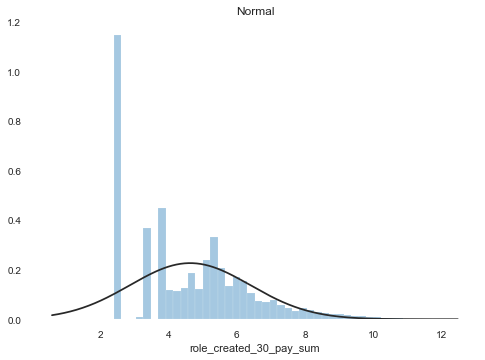

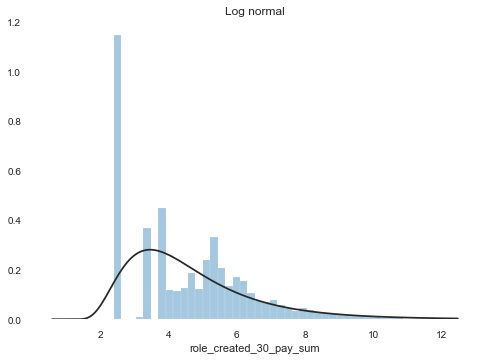

In [64]:
# 了解target总体分布情况
import scipy.stats as st
y = np.log1p(df[df['role_created_30_pay_sum'] > 0]['role_created_30_pay_sum'])
plt.figure(1);plt.title('Johnson SU')
sns.distplot(y,kde=False,fit=st.johnsonsu)
plt.figure(2);plt.title('Normal')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(3);plt.title('Log normal')
sns.distplot(y,kde=False,fit=st.lognorm)

In [65]:
# 相关性分析
df_numeric = df[numeric_features]
correlation = df.corr()
print(correlation['role_created_30_pay_sum'].sort_values(ascending=False),'\n')

role_created_30_pay_sum          1.000000
role_created_3_pay_sum           0.722022
pay_grade_6                      0.664175
pay_grade_4                      0.610571
role_created_3_pay_num           0.588673
pay_grade_5                      0.585669
role_created_3_pay_rate          0.571028
pay_grade_3                      0.534044
role_created_3_pay_avg           0.501646
pay_grade_2                      0.381903
pay_grade_1                      0.237403
active_18-24                     0.180069
active_14-18                     0.174573
active_8-12                      0.174016
role_created_3_online            0.173124
active_0-8                       0.164141
role_created_3_login_num         0.163953
active_12-14                     0.159338
role_created_3_max_role_level    0.120520
role_created_3_ip_num            0.115866
role_created_3_active            0.100125
role_created_3_device_num        0.027857
model_money_level                0.014560
platform                         0

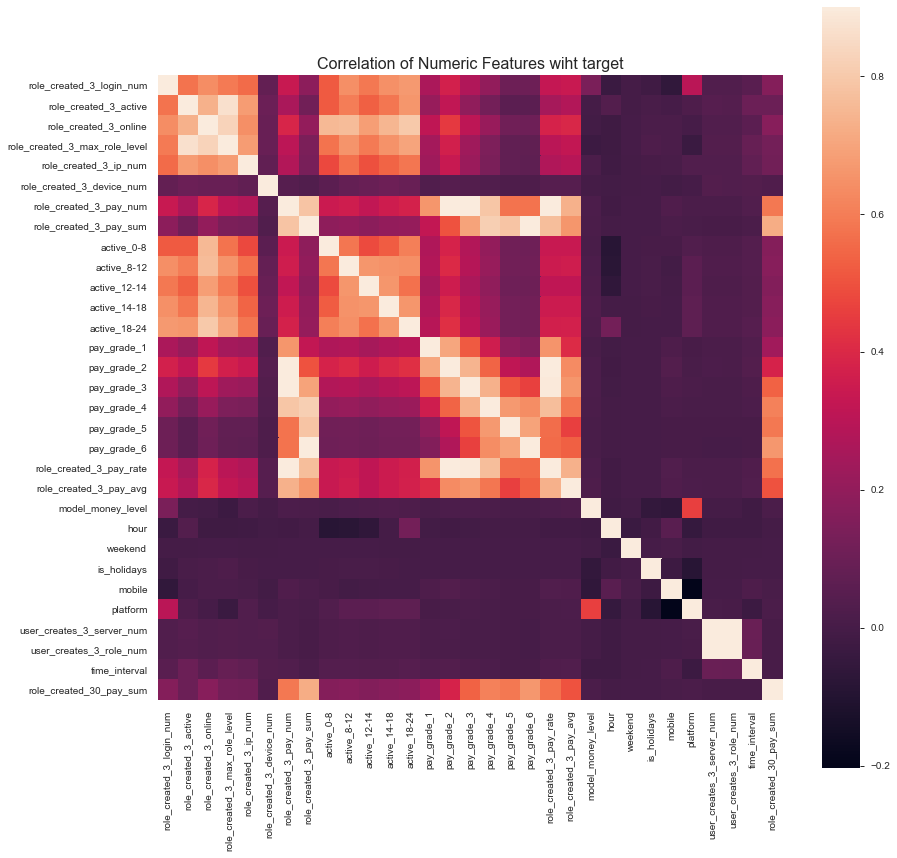

In [67]:
f, ax = plt.subplots(figsize=(14,14))
plt.title('Correlation of Numeric Features wiht target', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.9)

In [79]:
# 查看特征偏度和峰度
for col in numeric_features:
    print(col+'\t'+'Skewness:{:06.2f}'.format(df[col].skew())+'\t'+'Kurtosis:{:06.2f}'.format(df[col].kurtosis()))

role_created_3_login_num	Skewness:005.61	Kurtosis:044.07
role_created_3_active	Skewness:002.55	Kurtosis:005.00
role_created_3_online	Skewness:004.70	Kurtosis:024.33
role_created_3_max_role_level	Skewness:002.61	Kurtosis:005.66
role_created_3_ip_num	Skewness:006.89	Kurtosis:079.07
role_created_3_device_num	Skewness:037.65	Kurtosis:3742.44
role_created_3_pay_num	Skewness:024.80	Kurtosis:1034.84
role_created_3_pay_sum	Skewness:083.99	Kurtosis:13124.40
active_0-8	Skewness:010.28	Kurtosis:363.80
active_8-12	Skewness:006.92	Kurtosis:123.56
active_12-14	Skewness:007.53	Kurtosis:253.93
active_14-18	Skewness:006.64	Kurtosis:100.15
active_18-24	Skewness:006.09	Kurtosis:068.82
pay_grade_1	Skewness:014.61	Kurtosis:212.77
pay_grade_2	Skewness:014.38	Kurtosis:263.31
pay_grade_3	Skewness:025.01	Kurtosis:831.69
pay_grade_4	Skewness:046.91	Kurtosis:3164.41
pay_grade_5	Skewness:075.04	Kurtosis:7679.92
pay_grade_6	Skewness:117.89	Kurtosis:24969.77
role_created_3_pay_rate	Skewness:024.00	Kurtosis:971.45
r

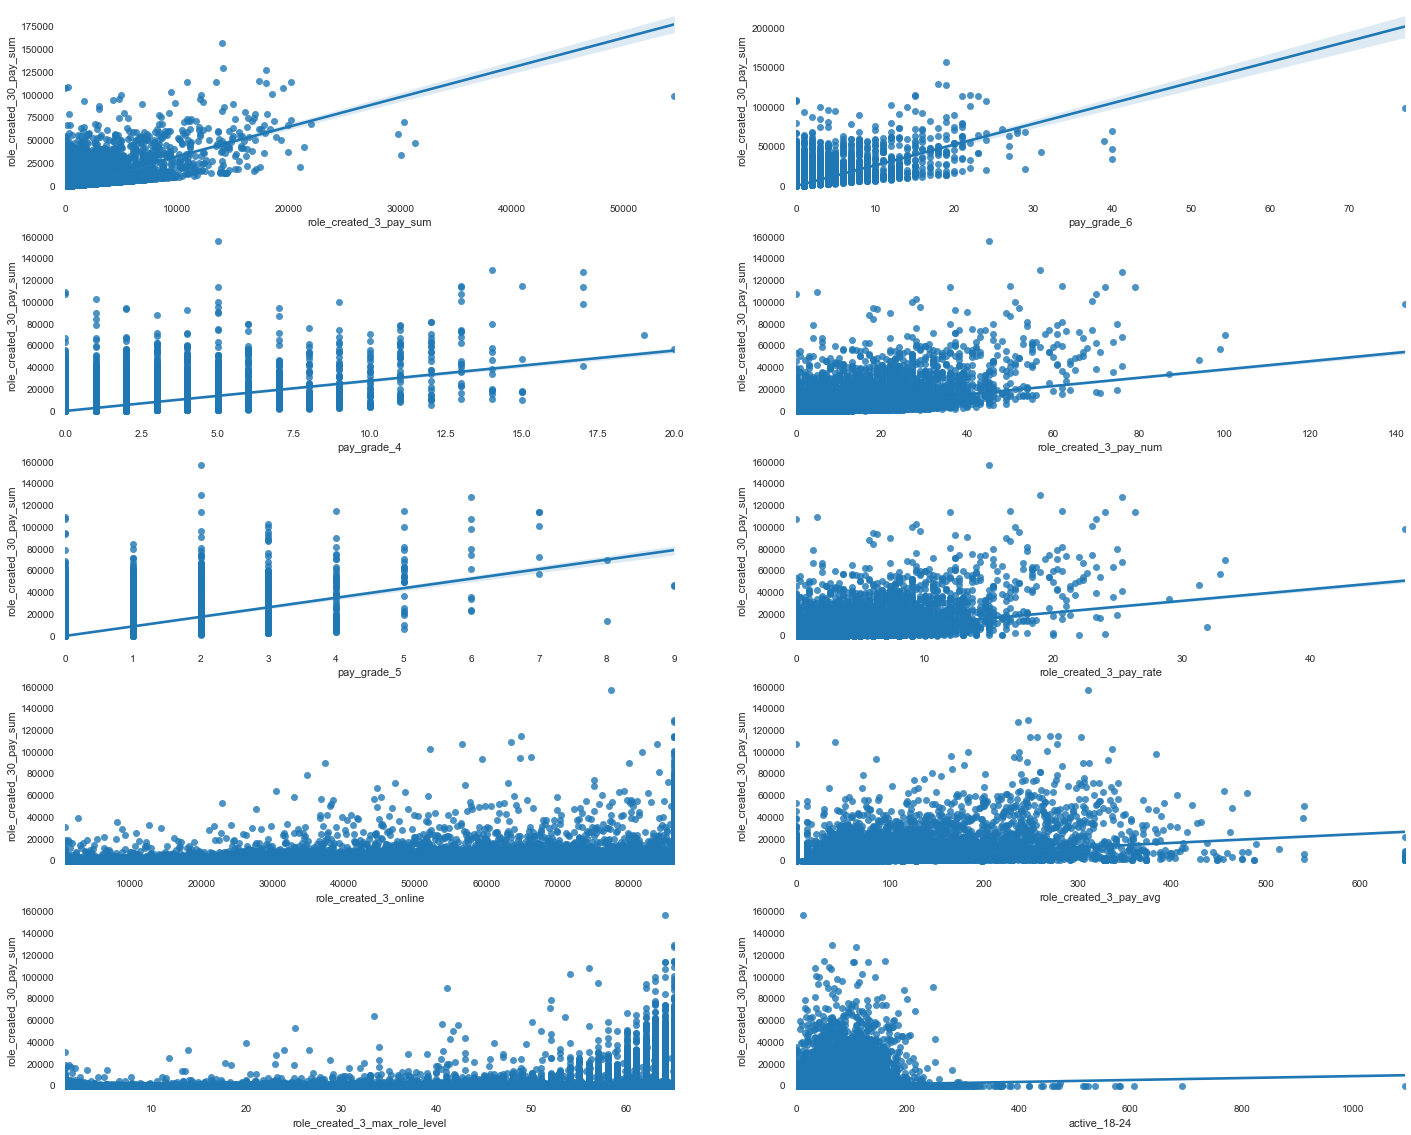

In [84]:
## 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['r1','r2','r3','max_role_level','p1','p2','p4','p5','p6',','game_pay_num','chmoney_pay_num']
r1_scatter_plot = pd.concat([df['role_created_30_pay_sum'],df['role_created_3_pay_sum']],axis = 1)
sns.regplot(x='role_created_3_pay_sum',y = 'role_created_30_pay_sum', data = r1_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

r2_scatter_plot = pd.concat([df['role_created_30_pay_sum'],df['pay_grade_6']],axis = 1)
sns.regplot(x='pay_grade_6',y = 'role_created_30_pay_sum', data = r2_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

r3_scatter_plot = pd.concat([df['role_created_30_pay_sum'],df['pay_grade_4']],axis = 1)
sns.regplot(x='pay_grade_4',y = 'role_created_30_pay_sum', data = r3_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

p1_scatter_plot = pd.concat([df['role_created_30_pay_sum'],df['role_created_3_pay_num']],axis = 1)
sns.regplot(x='role_created_3_pay_num',y = 'role_created_30_pay_sum', data = p1_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

p2_scatter_plot = pd.concat([df['role_created_30_pay_sum'],df['pay_grade_5']],axis = 1)
sns.regplot(x='pay_grade_5',y = 'role_created_30_pay_sum', data = p2_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

p4_scatter_plot = pd.concat([df['role_created_30_pay_sum'],df['role_created_3_pay_rate']],axis = 1)
sns.regplot(x='role_created_3_pay_rate',y = 'role_created_30_pay_sum', data = p4_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

p5_scatter_plot = pd.concat([df['role_created_30_pay_sum'],df['role_created_3_online']],axis = 1)
sns.regplot(x='role_created_3_online',y = 'role_created_30_pay_sum', data = p5_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

p6_scatter_plot = pd.concat([df['role_created_30_pay_sum'],df['role_created_3_pay_avg']],axis = 1)
sns.regplot(x='role_created_3_pay_avg',y = 'role_created_30_pay_sum', data = p6_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

game_pay_num_scatter_plot = pd.concat([df['role_created_30_pay_sum'],df['role_created_3_max_role_level']],axis = 1)
sns.regplot(x='role_created_3_max_role_level',y = 'role_created_30_pay_sum', data = game_pay_num_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

max_role_level_scatter_plot = pd.concat([df['role_created_30_pay_sum'],df['active_18-24']],axis = 1)
sns.regplot(x='active_18-24',y = 'role_created_30_pay_sum', data = max_role_level_scatter_plot,scatter= True, fit_reg=True, ax=ax10)


In [1]:
prf = pandas_profiling.ProfileReport(df)
prf.to_file('./data_profiling.html')

NameError: name 'pandas_profiling' is not defined